<a href="https://colab.research.google.com/github/rai-shi/Gelecegi-Yazanlar-Machine-Learning/blob/main/simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


http://faculty.marshall.usc.edu/gareth-james/ISL/data.html

Bir şirketin-ya da belirli bir kuruluşun reklam harcamaları neticesinde satışlarının ne şekilde oluştupu bilgisi verilmiş.
bağımlı değişken sales
bağımsız değişkenler TV radio newspaper
simple linear regression ile ilgilenildiği için sadece bir bağımsız değişken seçilecek

çeşitli medya platformları için oluşan harcamalar doğrultusunda oluşan satışları modelleyeceğiz.

basit ve çoklu doğrusal regresyon ekonometri bölümünde kocaman bir yer kaplayan geniş bir konudur. biz makine öğrenmesi kapsamında optimize edilecek parametrelere odaklanarak konuya dahil olacağız. sadec tahmin başarıları ve tahmin sonuçlarının başarısı üzerine duracağız. fakat değişken ve model anlamlılıkları, doğrusal modellerin varsayımları gibi konuları incelemeyeceğiz.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [ ]:
import seaborn as sns

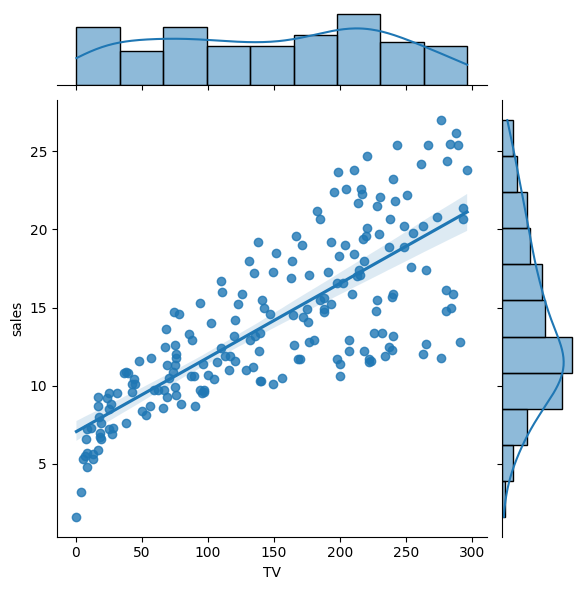

In [ ]:
# join plots
sns.jointplot(x='TV',y='sales',data=df,kind='reg');
# TVye yapılan harcama arttıkça satış artmış

In [ ]:
# şimdi bu ilişkiyi modelleyelim
from sklearn.linear_model import LinearRegression

In [ ]:
X = df[["TV"]]
X.head()
# bağımsız değişken

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [ ]:
Y = df[["sales"]]
Y.head()
# bağımlı değişken

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [ ]:
reg = LinearRegression()

In [ ]:
model = reg.fit(X,Y)
# model set up

In [ ]:
model

LinearRegression()

In [ ]:
str(model)

'LinearRegression()'

In [ ]:
dir(model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'featur

In [ ]:
# model.intercept_ # sabit b0
# model.coef_ # katsayı b1
print(model.intercept_, model.coef_)

[7.03259355] [[0.04753664]]


In [ ]:
# rkare model skoru
model.score(X,Y)
# rkare -> bağımlı değişkendeki değişikliğin bağımsız değişkenlerce açıklanma yüzdesidir.
# TV değişkeni satışın %60 ını açıklayabilir
# elimizdeki bağımsız değişkenler ile bağımlı değişkenin yüzde kaçını açıklayabiliyoruz

0.611875050850071

### Tahmin

In [ ]:
# b0 ve b1 parametrelerini bulmak için birden fazla yöntem var
# çoklu regresyonda özellikle değişken sayısı arttıkça değişkenlere ilişkin katsayıları bulmak için çeşitli yöntemler vardıt
# parametre tahmin yöntemleri sklearn ve stats kütüphanelerinde farklı yöntemler var.
# biz burada skitlearn kullanacağız
# parametre yöntemlerine göre model çıktısı değişebilmekte ve yorumlanabilmektedir.
# biz sadece model hiperparametre optimizasyonu ve başarısına odaklanacağımız için, yüksek başarılı tahminler yapacağımızdan istatitik literatürüne göre neden sonuç bağlamında değilde model başarısına göre ilerlediğimizden skitlearn yeterli

<ipython-input-40-522aa879eacb>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  g.set_title("Model Denklemi: Sales = %.2f + TV* %.2f" % (model.intercept_, model.coef_) );


(0.0, 28.27)

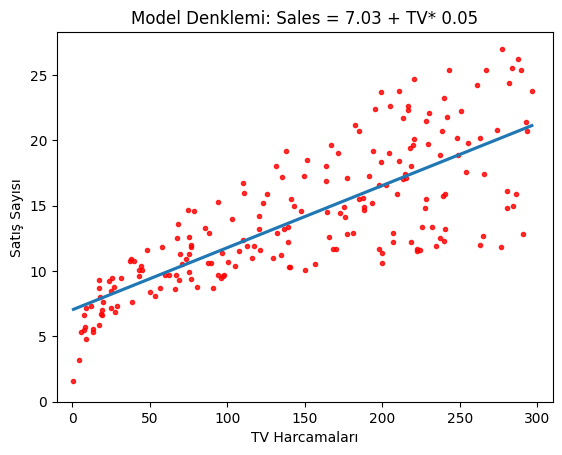

In [ ]:
# geometrik görünüm

import matplotlib.pyplot as plt
g = sns.regplot(x=df["TV"], y=df["sales"], ci=None, scatter_kws={'color': 'r', 's': 9});
g.set_title("Model Denklemi: Sales = %.2f + TV* %.2f" % (model.intercept_, model.coef_) );
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom=0)

In [ ]:
# Tahmin
# tv-reklam harcamasına ne kadar yatırım yaparsam satışlarım ne olur?
7.03 + 0.05*165

15.280000000000001

In [ ]:
model.intercept_ + model.coef_*165

array([[14.87613922]])

In [ ]:
model.predict([[165]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[14.87613922]])

In [ ]:
new_data_for_TV =[[5], [15], [30], [200], [800]]

In [ ]:
model.predict(new_data_for_TV)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[ 7.27027675],
       [ 7.74564316],
       [ 8.45869276],
       [16.53992164],
       [45.0619059 ]])